In [14]:
import pandas as pd

In [15]:
import urllib.request

In [16]:
# Download data

In [17]:
source_url = "ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"
gff_file="E_coli.gff.gz"


In [18]:
urllib.request.urlretrieve(source_url, gff_file)


('E_coli.gff.gz', <email.message.Message at 0x193ed824f08>)

In [31]:
gff_data = pd.read_csv(gff_file, sep="\t", comment="#",
                      names = ["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])

In [32]:
gff_data

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000913.3,RefSeq,region,1,4641652,.,+,.,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;...
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
...,...,...,...,...,...,...,...,...,...
10116,NC_000913.3,RefSeq,CDS,4639590,4640306,.,-,0,ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=Un...
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."
10118,NC_000913.3,RefSeq,CDS,4640402,4640542,.,+,0,ID=cds-NP_418819.1;Parent=gene-b4402;Dbxref=Un...
10119,NC_000913.3,RefSeq,gene,4640942,4641628,.,+,.,"ID=gene-b4403;Dbxref=ASAP:ABE-0014442,ECOCYC:E..."


In [21]:
gff_data.shape

(10121, 9)

In [22]:
gff_data['type']

0        region
1          gene
2           CDS
3          gene
4           CDS
          ...  
10116       CDS
10117      gene
10118       CDS
10119      gene
10120       CDS
Name: type, Length: 10121, dtype: object

In [23]:
gff_data["type"].unique()

array(['region', 'gene', 'CDS', 'repeat_region', 'mobile_genetic_element',
       'ncRNA', 'exon', 'rRNA', 'tRNA', 'pseudogene', 'sequence_feature',
       'recombination_feature', 'origin_of_replication'], dtype=object)

In [24]:
gff_data["type"].value_counts()

gene                      4419
CDS                       4379
repeat_region              697
exon                       180
pseudogene                 166
tRNA                        86
ncRNA                       72
mobile_genetic_element      49
sequence_feature            48
rRNA                        22
origin_of_replication        1
recombination_feature        1
region                       1
Name: type, dtype: int64

In [25]:
gff_data["type"] == "gene"

0        False
1         True
2        False
3         True
4        False
         ...  
10116    False
10117     True
10118    False
10119     True
10120    False
Name: type, Length: 10121, dtype: bool

In [26]:
gff_data[gff_data["type"] == "gene"]

,seqid,source,type,start,end,score,stand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [27]:
gene_data = gff_data[gff_data["type"] == "gene"]

In [33]:
gff_data[(gff_data["type"] == "gene" ) & (gff_data["strand"] == "+")]

,seqid,source,type,start,end,score,strand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10109,NC_000913.3,RefSeq,gene,4636007,4636696,.,+,.,"ID=gene-b4398;Dbxref=ASAP:ABE-0014428,ECOCYC:E..."
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [36]:
strand_plus_gene_data = gff_data[(gff_data["type"] == "gene" ) & (gff_data["strand"] == "+")]

In [37]:
%who

gene_data	 gff_data	 gff_file	 pd	 source_url	 stand_plus_gene_data	 strand_plus_gene_data	 urllib	 


In [40]:
strand_plus_gene_data.to_csv(strand_plus_gene_data.csv)

AttributeError: 'DataFrame' object has no attribute 'csv'

In [42]:
gene_data

,seqid,source,type,start,end,score,stand,phase,attributes
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."
...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E..."
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E..."
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E..."
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G..."


In [43]:
gene_data["length"] = gene_data["end"]-gene_data["start"]

C:\Users\YH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
gene_data

,seqid,source,type,start,end,score,stand,phase,attributes,length
1,NC_000913.3,RefSeq,gene,190,255,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",65
3,NC_000913.3,RefSeq,gene,337,2799,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",2462
5,NC_000913.3,RefSeq,gene,2801,3733,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",932
7,NC_000913.3,RefSeq,gene,3734,5020,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",1286
9,NC_000913.3,RefSeq,gene,5234,5530,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",296
...,...,...,...,...,...,...,...,...,...,...
10111,NC_000913.3,RefSeq,gene,4636696,4638120,.,+,.,"ID=gene-b4399;Dbxref=ASAP:ABE-0014430,ECOCYC:E...",1424
10113,NC_000913.3,RefSeq,gene,4638178,4639530,.,+,.,"ID=gene-b4400;Dbxref=ASAP:ABE-0014432,ECOCYC:E...",1352
10115,NC_000913.3,RefSeq,gene,4639590,4640306,.,-,.,"ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:E...",716
10117,NC_000913.3,RefSeq,gene,4640402,4640542,.,+,.,"ID=gene-b4402;Dbxref=ASAP:ABE-0014437,ECOCYC:G...",140


In [45]:
gene_data["length"].mean()

911.7795881421137

In [46]:
gene_data["length"].median()

806.0

In [47]:
%matplotlib inline

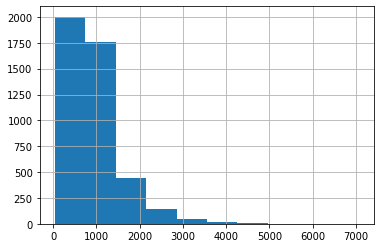

In [48]:
gene_data["length"].hist()

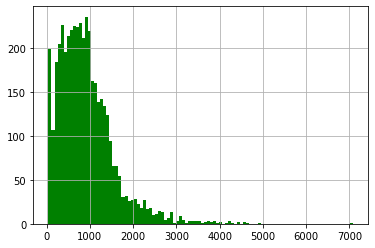

In [56]:
gene_data["length"].hist(bins=100, color="green")

In [60]:
fig = ax.get_figure()

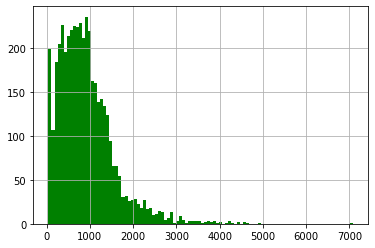

In [59]:
ax = gene_data["length"].hist(bins=100, color="green")

In [61]:
fig.savefig("plot.pdf")